In [3]:
import pdat
import os
import numpy as np
np.bool = bool
import antropy as ant
import matplotlib.pyplot as plt
import nolds
import pywt
from tqdm import tqdm as tqd
import psrchive
from concurrent.futures import ProcessPoolExecutor 
import pandas as pd

In [5]:
file_names = ['f210820_041554.DFp', 
            'f210820_105959.DFp',
            'f210823_120959.DFp',
            'f210823_124534.DFp',
            'f210828_190858.DFp',
            'f210906_152306.DFp',
            'f210920_142859.DFp',
            'f210921_002549.DFp',
            'f210921_004724.DFp',
            'f210922_085559.DFp',
            'f210929_090945.DFp']

f210820_041554.DFp
Loading PSRFITS file from path:
    'Wang/single_pulse_DFp/f210820_041554.DFp'.
PSRJ            J1012+5307
(101769, 1, 1, 512)
Saved all Single_Pulses to Wang/Single_Pulses_CSV/PSRJ            J1012+5307.csv
1.17008638381958 2.326073408126831


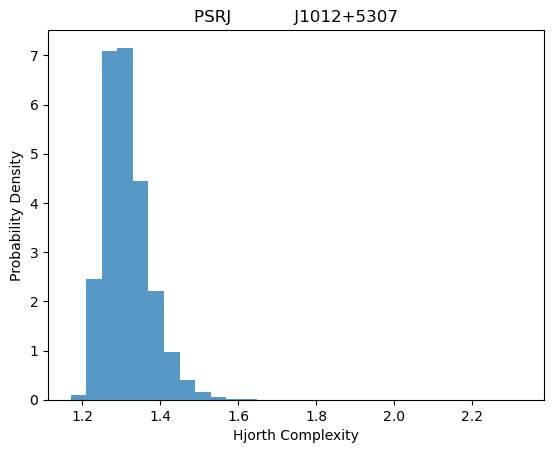

f210820_105959.DFp
Loading PSRFITS file from path:
    'Wang/single_pulse_DFp/f210820_105959.DFp'.
PSRJ           J1713+0747
(125899, 1, 1, 256)
Saved all Single_Pulses to Wang/Single_Pulses_CSV/PSRJ           J1713+0747.csv
1.1587945222854614 3.021674156188965


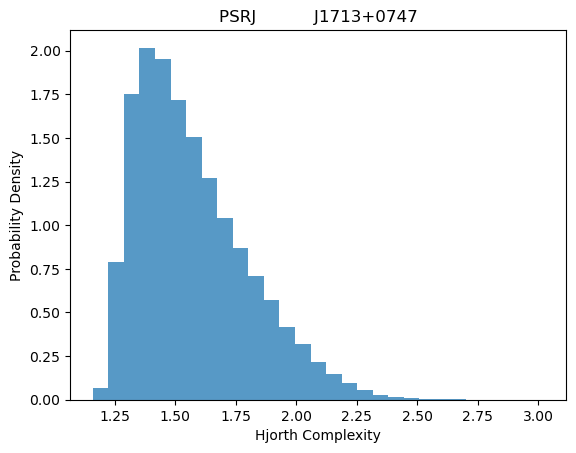

f210823_120959.DFp
Loading PSRFITS file from path:
    'Wang/single_pulse_DFp/f210823_120959.DFp'.
PSRJ            J1944+0907
(225500, 1, 1, 512)


KeyboardInterrupt: 

In [ ]:
for address in file_names:   
    print(address)
    psrfit_data = pdat.psrfits('Wang/single_pulse_DFp/'+address)
    
    data_all = psrfit_data[2].read()
    PSR_name = data_all[0]
    # Extract the first element of the tuple and decode it
    decoded_name = PSR_name[0].decode('utf-8').strip()
    PSR_name = decoded_name
    # Extract the actual pulsar name (e.g., "J1012+5307")
    pulsar_name = decoded_name.split()[1]  # Split by whitespace and take the second part
    print(PSR_name)
    del data_all
    data_all = psrfit_data[4].read()
      
    DATA     = data_all["DATA"] 
    DAT_SCL  = data_all["DAT_SCL"]
    DAT_OFFS = data_all["DAT_OFFS"]
    DAT_FREQ = data_all["DAT_FREQ"]
    print(np.shape(DATA))
    Flux_all = np.zeros([np.shape(DATA)[3],1])  # average pulse profile
    
    # initilizing Statistical measures for single pulses 
    # perm_entropy_single_pulses = np.zeros([np.shape(DATA)[0],1])
    # fractal_dims_single_pulses = np.zeros([np.shape(DATA)[0],1])
    # Lempel_Ziv_single_pulses = np.zeros([np.shape(DATA)[0],1])
    # spectral_entropy_single_pulses = np.zeros([np.shape(DATA)[0],1])
    # zero_crossing_single_pulses = np.zeros([np.shape(DATA)[0],1])
    hj_complexity_single_pulses = np.zeros([np.shape(DATA)[0],1])
    
    all_pulses=[]
    # Loading Single Pulses 
    for i in range(np.shape(DATA)[0]):
        Single_Pulses = np.zeros(np.shape(DATA)[3]) # Single pulse profiles for each frequesncy 
        Single_Pulses = DATA[i,0,0,:]*DAT_SCL[i] + DAT_OFFS[i]
        all_pulses.append(Single_Pulses)  # Append each Single_Pulses to the list

        



        # call any statistics/complexity functions here 
        # perm_entropy_single_pulses[i] = ant.perm_entropy(Single_Pulses, delay=[1,2,3,4], order=10, normalize=True)
        # binary_single_pulses = (Single_Pulses > np.mean(Single_Pulses)).astype(int)
        # Lempel_Ziv_single_pulses[i] = ant.lziv_complexity(binary_single_pulses, normalize=True)
        # spectral_entropy_single_pulses[i] = ant.spectral_entropy(Single_Pulses, sf=1, normalize=True)
        # zero_crossing_single_pulses[i] = ant.num_zerocross(Single_Pulses - np.median(Single_Pulses), normalize=True)
        _, hj_complexity_single_pulses[i] = ant.hjorth_params(Single_Pulses)


    # Convert the list of pulses to a DataFrame
    df = pd.DataFrame(all_pulses)

    # Save the DataFrame to a single CSV file
    output_file = "Wang/Single_Pulses_CSV/" + pulsar_name + ".csv"
    df.to_csv(output_file, index=False, header=False)

    print(f"Saved all Single_Pulses to {output_file}")
    
    # Plotting the histogram of the permutation entropy values
    # p = plt.hist(spectral_entropy_single_pulses,
    #               bins=np.linspace(np.min(spectral_entropy_single_pulses), 1, 100), 
    #                                 density=True, alpha=0.75)
    p = plt.hist(hj_complexity_single_pulses,
                  bins=np.linspace(np.min(hj_complexity_single_pulses), np.max(hj_complexity_single_pulses), 30),
                                density=True, alpha=0.75)
    print(np.min(hj_complexity_single_pulses), np.max(hj_complexity_single_pulses))
    # p = plt.hist(zero_crossing_single_pulses,
    #               bins=np.linspace(np.min(zero_crossing_single_pulses), np.max(zero_crossing_single_pulses), 30), 
    #                                 density=True, alpha=0.75)
    # plt.xlabel('Correlation Dimension')
    # plt.xlabel('Lempel-Ziv Complexity')
    # plt.xlabel('Spectral Entropy')
    # plt.xlabel('Zero Crossing Rate')
    plt.xlabel('Hjorth Complexity')
    plt.ylabel('Probability Density')
    # plt.xlim([0.9, 1])
    # plt.ylim([0, 1])
    plt.title(pulsar_name)
    # plt.savefig('statFigs/fractal_dim/fractal_dim-kmax-10/' + address.replace(".DFp", "")+'.png', dpi=400)
    # plt.savefig('Wang/statFigs/fractal_dim/corr_dim-emb_dim-2/' + address.replace(".DFp", "")+'.png', dpi=400)
    # plt.savefig('Wang/statFigs/Spectral_Entropy/' + address.replace(".DFp", "")+'.png', dpi=400)
    # plt.savefig('Wang/statFigs/Zero_Crossing/' + address.replace(".DFp", "")+'.png', dpi=400)
    plt.savefig('Wang/statFigs/Hjorth_Complexity/' + address.replace(".DFp", "")+'.png', dpi=400)
    plt.show()
    # #plotting average pulse 
    # for i in range(np.shape(DATA)[3]):
    #     Flux_all[i] = np.sum(DATA[:,0,0,i]*DAT_SCL[:] + DAT_OFFS[:])

    # # perm_entropy_average_pulse = ant.perm_entropy(Flux_all, order=3, delay=1, normalize=True)
    # # print(perm_entropy_average_pulse)

    
    # # # seems like we have 512 time channels in 
    # fig = plt.figure()
    # plt.plot(Flux_all/np.max(Flux_all))
    # plt.xlabel('Phase')
    # plt.ylabel('Normalized Total Flux')
    # plt.savefig('PulseProfiles/' + address+'.png', dpi=400)
    # plt.close()

In [ ]:
arch = psrchive.Archive_load('Vela/single_pulses/2021-05-10-070130.ar')
arch.get_source()

'J0835-4510'

In [ ]:
data = arch.get_data()
np.shape(data)

(112, 4, 16, 8192)

In [ ]:
ts = np.random.rand(10)

# Convert to binary (e.g., median threshold)
binary_ts = (ts > np.median(ts)).astype(int)

In [ ]:
ts

array([0.4542704 , 0.2421464 , 0.88225927, 0.09341606, 0.02285273,
       0.12428255, 0.62544438, 0.56531774, 0.2921612 , 0.21195601])

In [ ]:
binary_ts

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
np.max(spectral_entropy_single_pulses)+0.1

1.046099907147441